## **Project Overview**

# **MOTHER OF ALL DEALS**

## **India–EU Free Trade Agreement: Passenger Car Import Cost Analysis**

This project analyzes the potential impact of the ongoing India–European Union Free Trade Agreement (FTA) negotiations on passenger vehicle import costs in India.

The dataset uses real-world vehicle specifications and ex-showroom prices from public Indian sources. Import CIF values are estimated using industry-standard assumptions, as actual manufacturer invoice prices are not publicly disclosed.

Two policy scenarios are evaluated:
- **No_FTA**: Current Indian import duty structure
- **With_FTA**: Reduced customs duty scenario consistent with proposals under discussion in India–EU trade negotiations

The analysis quantifies changes in import taxes, landed costs, and savings to assess how tariff liberalization may affect different vehicle segments and brands.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
file_path = r'India_EU_Model.xlsx'

## **Loading data sets**

In [3]:
car_master = pd.read_excel(file_path, sheet_name = 'car_master')

In [4]:
tax_para = pd.read_excel(file_path, sheet_name = 'tax_parameters')

In [5]:
cost_model = pd.read_excel(file_path, sheet_name = 'import_cost_model')

In [7]:
car_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   record_id        37 non-null     int64 
 1   product_code     37 non-null     int64 
 2   brand_name       37 non-null     object
 3   model_name       37 non-null     object
 4   trim_variant     37 non-null     object
 5   fuel_type        37 non-null     object
 6   engine_cc        37 non-null     int64 
 7   ex_showroom_inr  37 non-null     int64 
 8   import_cif_inr   37 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 2.7+ KB


In [8]:
tax_para.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   scenario   2 non-null      object 
 1   bcd_rate   2 non-null      float64
 2   sws_rate   2 non-null      float64
 3   igst_rate  2 non-null      float64
 4   cess_rate  2 non-null      float64
dtypes: float64(4), object(1)
memory usage: 212.0+ bytes


In [9]:
tax_para

,scenario,bcd_rate,sws_rate,igst_rate,cess_rate
0,No_FTA,0.7,0.1,0.28,0.22
1,With_FTA,0.1,0.1,0.28,0.22


In [10]:
car_master

,record_id,product_code,brand_name,model_name,trim_variant,fuel_type,engine_cc,ex_showroom_inr,import_cif_inr
0,1,101,Mercedes-Benz,A-Class Limousine,A200,Petrol,1332,4600000,3800000
1,2,102,Mercedes-Benz,A-Class Limousine,A200d,Diesel,1950,4800000,4000000
2,3,103,Mercedes-Benz,C-Class,C200,Petrol,1999,5900000,5000000
3,4,104,Mercedes-Benz,C-Class,C220d,Diesel,1993,6400000,5400000
4,5,105,Mercedes-Benz,E-Class,E200,Petrol,1999,7800000,6500000
5,6,106,Mercedes-Benz,E-Class,E220d,Diesel,1950,8200000,6800000
6,7,107,Mercedes-Benz,GLA,220,Petrol,1991,5000000,4200000
7,8,108,Mercedes-Benz,GLA,220d,Diesel,1950,5300000,4400000
8,9,109,Mercedes-Benz,GLC,300,Petrol,1999,7400000,6200000
9,10,110,Mercedes-Benz,GLC,220d,Diesel,1993,7700000,6500000


In [18]:
cost_model.head()

,record_id,product_code,brand_name,model_name,trim_variant,scenario,import_cif_inr,bcd_inr,sws_inr,igst_base_inr,igst_inr,cess_inr,total_tax_inr,landed_cost_inr,fta_savings_inr
0,1.0,101.0,Mercedes-Benz,A-Class Limousine,A200,with_FTA,3800000.0,380000.0,38000.0,4218000.0,1181040.0,927960.0,2527000.0,6327000.0,2527000.0
1,2.0,102.0,Mercedes-Benz,A-Class Limousine,A200d,with_FTA,4000000.0,400000.0,40000.0,4440000.0,1243200.0,976800.0,2660000.0,6660000.0,2660000.0
2,3.0,103.0,Mercedes-Benz,C-Class,C200,with_FTA,5000000.0,500000.0,50000.0,5550000.0,1554000.0,1221000.0,3325000.0,8325000.0,3325000.0
3,4.0,104.0,Mercedes-Benz,C-Class,C220d,with_FTA,5400000.0,540000.0,54000.0,5994000.0,1678320.0,1318680.0,3591000.0,8991000.0,3591000.0
4,5.0,105.0,Mercedes-Benz,E-Class,E200,with_FTA,6500000.0,650000.0,65000.0,7215000.0,2020200.0,1587300.0,4322500.0,10822500.0,4322500.0


In [16]:
car_master.columns

Index(['record_id', 'product_code', 'brand_name', 'model_name', 'trim_variant',
       'fuel_type', 'engine_cc', 'ex_showroom_inr', 'import_cif_inr'],
      dtype='object')

In [17]:
cost_model.columns

Index(['record_id', 'product_code', 'brand_name', 'model_name', 'trim_variant',
       'scenario', 'import_cif_inr', 'bcd_inr', 'sws_inr', 'igst_base_inr',
       'igst_inr', 'cess_inr', 'total_tax_inr', 'landed_cost_inr',
       'fta_savings_inr'],
      dtype='object')

In [19]:
tax_para.columns

Index(['scenario', 'bcd_rate', 'sws_rate', 'igst_rate', 'cess_rate'], dtype='object')

In [24]:
cost_model.describe().T

,count,mean,std,min,25%,50%,75%,max
record_id,74.0,3.750000e+01,2.150581e+01,1.0,19.25,37.5,55.75,74.0
product_code,74.0,1.375000e+02,2.150581e+01,101.0,119.25,137.5,155.75,174.0
import_cif_inr,74.0,3.822432e+06,2.193042e+06,780000.0,1500000.00,4000000.0,5800000.00,7800000.0
bcd_inr,74.0,1.528973e+06,1.592282e+06,78000.0,405000.00,672500.0,2800000.00,5460000.0
sws_inr,74.0,1.528973e+05,1.592282e+05,7800.0,40500.00,67250.0,280000.00,546000.0
igst_base_inr,74.0,5.504303e+06,3.479873e+06,865800.0,1991250.00,5152500.0,7647000.00,13806000.0
igst_inr,74.0,1.541205e+06,9.743646e+05,242424.0,557550.00,1442700.0,2141160.00,3865680.0
cess_inr,74.0,1.210947e+06,7.655722e+05,190476.0,438075.00,1133550.0,1682340.00,3037320.0
total_tax_inr,74.0,4.434022e+06,3.358438e+06,518700.0,1830875.00,3391500.0,6620000.00,12909000.0
landed_cost_inr,74.0,8.256454e+06,5.219810e+06,1298700.0,2986875.00,7728750.0,11470500.00,20709000.0


In [22]:
#Check Unique Values of Each Column

cost_model.nunique()

record_id          74
product_code       74
brand_name          5
model_name         25
trim_variant       27
scenario            2
import_cif_inr     31
bcd_inr            61
sws_inr            61
igst_base_inr      62
igst_inr           62
cess_inr           62
total_tax_inr      62
landed_cost_inr    62
fta_savings_inr    31
dtype: int64

# **Descriptive Statistics**



Descriptive analysis reveals that import taxes under the current regime constitute a significant proportion of vehicle CIF values, resulting in high landed costs. The introduction of reduced customs duty under the FTA scenario leads to a substantial decline in total import taxes and landed costs.

Absolute FTA savings are strongly correlated with vehicle value, with premium vehicles realizing larger monetary benefits. However, percentage savings remain relatively consistent across vehicles and brands, indicating that the FTA impact is primarily driven by uniform tariff reductions rather than product-specific factors.

Despite tariff reductions, indirect taxes such as IGST and compensation cess continue to represent a significant portion of landed cost, limiting the overall reduction in final import prices.


In [29]:
#Float Format 
pd.options.display.float_format = '{:,.2f}'.format

In [30]:
with_fta = cost_model[cost_model["scenario"]=="with_FTA"]

with_fta[["fta_savings_inr"]].describe()


,fta_savings_inr
count,37.00
mean,"2,541,917.57"
std,"1,468,465.47"
min,"518,700.00"
25%,"997,500.00"
50%,"2,660,000.00"
75%,"3,857,000.00"
max,"5,187,000.00"


In [35]:
cost_model.groupby("scenario")[
    ["total_tax_inr", "landed_cost_inr"]
].describe()

total_tax_inr                                                      \
                 count         mean          std          min          25%   
scenario                                                                     
no_FTA           37.00 6,326,125.68 3,654,602.02 1,290,900.00 2,482,500.00   
with_FTA         37.00 2,541,917.57 1,468,465.47   518,700.00   997,500.00   

                                                 landed_cost_inr  \
                  50%          75%           max           count   
scenario                                                           
no_FTA   6,620,000.00 9,599,000.00 12,909,000.00           37.00   
with_FTA 2,660,000.00 3,857,000.00  5,187,000.00           37.00   

                                                                             \
                  mean          std          min          25%           50%   
scenario                                                                      
no_FTA   10,148,558.11 5,862,820.77 2,070,900.00 3,982,500.00 10,620,000.00   
with_FTA  6,364,350.00 3,676,684.21 1,298,700.00 2,497,500.00  6,660,000.00   

                                      
                   75%           max  
scenario                              
no_FTA   15,399,000.00 20,709,000.00  
with_FTA  9,657,000.00 12,987,000.00

In [39]:
with_fta.groupby("brand_name")[
    ["fta_savings_inr"]
].agg(["mean", "median", "std"])


fta_savings_inr                          
                         mean       median          std
brand_name                                             
Audi             3,577,700.00 3,458,000.00   710,648.26
BMW              3,845,916.67 4,123,000.00 1,109,906.05
Mercedes-Benz    3,511,200.00 3,458,000.00   767,747.87
Skoda            1,363,250.00   964,250.00   876,943.14
Volkswagen         979,545.00   748,125.00   536,763.44

# **Observation** 

- No_FTA shows significantly higher average total tax than With_FTA
- Variance in taxes reduces post-FTA due to lower customs duty
- Even post-FTA, landed cost remains high due to IGST and cess
- Premium European brands gain higher absolute savings

In [42]:
with_fta

,record_id,product_code,brand_name,model_name,trim_variant,scenario,import_cif_inr,bcd_inr,sws_inr,igst_base_inr,igst_inr,cess_inr,total_tax_inr,landed_cost_inr,fta_savings_inr
0,1.00,101.00,Mercedes-Benz,A-Class Limousine,A200,with_FTA,"3,800,000.00","380,000.00","38,000.00","4,218,000.00","1,181,040.00","927,960.00","2,527,000.00","6,327,000.00","2,527,000.00"
1,2.00,102.00,Mercedes-Benz,A-Class Limousine,A200d,with_FTA,"4,000,000.00","400,000.00","40,000.00","4,440,000.00","1,243,200.00","976,800.00","2,660,000.00","6,660,000.00","2,660,000.00"
2,3.00,103.00,Mercedes-Benz,C-Class,C200,with_FTA,"5,000,000.00","500,000.00","50,000.00","5,550,000.00","1,554,000.00","1,221,000.00","3,325,000.00","8,325,000.00","3,325,000.00"
3,4.00,104.00,Mercedes-Benz,C-Class,C220d,with_FTA,"5,400,000.00","540,000.00","54,000.00","5,994,000.00","1,678,320.00","1,318,680.00","3,591,000.00","8,991,000.00","3,591,000.00"
4,5.00,105.00,Mercedes-Benz,E-Class,E200,with_FTA,"6,500,000.00","650,000.00","65,000.00","7,215,000.00","2,020,200.00","1,587,300.00","4,322,500.00","10,822,500.00","4,322,500.00"
5,6.00,106.00,Mercedes-Benz,E-Class,E220d,with_FTA,"6,800,000.00","680,000.00","68,000.00","7,548,000.00","2,113,440.00","1,660,560.00","4,522,000.00","11,322,000.00","4,522,000.00"
6,7.00,107.00,Mercedes-Benz,GLA,220,with_FTA,"4,200,000.00","420,000.00","42,000.00","4,662,000.00","1,305,360.00","1,025,640.00","2,793,000.00","6,993,000.00","2,793,000.00"
7,8.00,108.00,Mercedes-Benz,GLA,220d,with_FTA,"4,400,000.00","440,000.00","44,000.00","4,884,000.00","1,367,520.00","1,074,480.00","2,926,000.00","7,326,000.00","2,926,000.00"
8,9.00,109.00,Mercedes-Benz,GLC,300,with_FTA,"6,200,000.00","620,000.00","62,000.00","6,882,000.00","1,926,960.00","1,514,040.00","4,123,000.00","10,323,000.00","4,123,000.00"
9,10.00,110.00,Mercedes-Benz,GLC,220d,with_FTA,"6,500,000.00","650,000.00","65,000.00","7,215,000.00","2,020,200.00","1,587,300.00","4,322,500.00","10,822,500.00","4,322,500.00"


In [44]:
no_fta = cost_model[cost_model["scenario"]=="no_FTA"]

In [45]:
no_fta

,record_id,product_code,brand_name,model_name,trim_variant,scenario,import_cif_inr,bcd_inr,sws_inr,igst_base_inr,igst_inr,cess_inr,total_tax_inr,landed_cost_inr,fta_savings_inr
38,38.00,138.00,Mercedes-Benz,A-Class Limousine,A200,no_FTA,"3,800,000.00","2,660,000.00","266,000.00","6,726,000.00","1,883,280.00","1,479,720.00","6,289,000.00","10,089,000.00",NaN
39,39.00,139.00,Mercedes-Benz,A-Class Limousine,A200d,no_FTA,"4,000,000.00","2,800,000.00","280,000.00","7,080,000.00","1,982,400.00","1,557,600.00","6,620,000.00","10,620,000.00",NaN
40,40.00,140.00,Mercedes-Benz,C-Class,C200,no_FTA,"5,000,000.00","3,500,000.00","350,000.00","8,850,000.00","2,478,000.00","1,947,000.00","8,275,000.00","13,275,000.00",NaN
41,41.00,141.00,Mercedes-Benz,C-Class,C220d,no_FTA,"5,400,000.00","3,780,000.00","378,000.00","9,558,000.00","2,676,240.00","2,102,760.00","8,937,000.00","14,337,000.00",NaN
42,42.00,142.00,Mercedes-Benz,E-Class,E200,no_FTA,"6,500,000.00","4,550,000.00","455,000.00","11,505,000.00","3,221,400.00","2,531,100.00","10,757,500.00","17,257,500.00",NaN
43,43.00,143.00,Mercedes-Benz,E-Class,E220d,no_FTA,"6,800,000.00","4,760,000.00","476,000.00","12,036,000.00","3,370,080.00","2,647,920.00","11,254,000.00","18,054,000.00",NaN
44,44.00,144.00,Mercedes-Benz,GLA,220,no_FTA,"4,200,000.00","2,940,000.00","294,000.00","7,434,000.00","2,081,520.00","1,635,480.00","6,951,000.00","11,151,000.00",NaN
45,45.00,145.00,Mercedes-Benz,GLA,220d,no_FTA,"4,400,000.00","3,080,000.00","308,000.00","7,788,000.00","2,180,640.00","1,713,360.00","7,282,000.00","11,682,000.00",NaN
46,46.00,146.00,Mercedes-Benz,GLC,300,no_FTA,"6,200,000.00","4,340,000.00","434,000.00","10,974,000.00","3,072,720.00","2,414,280.00","10,261,000.00","16,461,000.00",NaN
47,47.00,147.00,Mercedes-Benz,GLC,220d,no_FTA,"6,500,000.00","4,550,000.00","455,000.00","11,505,000.00","3,221,400.00","2,531,100.00","10,757,500.00","17,257,500.00",NaN


# **Overall Dataset Overview**

## Dataset Overview

- The dataset consists of passenger vehicle import cost records evaluated under two policy scenarios: **No_FTA** and **With_FTA**. Each vehicle appears twice in the dataset, once under each scenario, enabling direct within-vehicle comparison of import tax outcomes.

- The dataset includes vehicle-level identifiers (brand, model, trim), estimated CIF values, detailed tax components, total import taxes, landed cost calculations, and FTA-driven savings metrics.

- There are no missing values in the core tax and cost variables, ensuring analytical consistency. Missing values are present only in FTA savings fields for No_FTA observations, which is expected by design.

- Numeric variables exhibit substantial dispersion, reflecting the wide range of vehicle values and tax burdens across mass-market and premium segments. Scenario-wise grouping confirms that import taxes and landed costs are systematically lower under the With_FTA scenario.

- Overall, the dataset is well-structured, internally consistent, and suitable for descriptive analysis, comparative evaluation, and policy impact assessment.


# **Outliers Detection**


In [47]:
num_cols = cost_model.select_dtypes(include = 'number').columns.tolist()

In [48]:
num_cols

['record_id',
 'product_code',
 'import_cif_inr',
 'bcd_inr',
 'sws_inr',
 'igst_base_inr',
 'igst_inr',
 'cess_inr',
 'total_tax_inr',
 'landed_cost_inr',
 'fta_savings_inr']

In [49]:
#Plot settings

cols = 3
rows = (len(num_cols) + cols - 1) // cols

In [51]:
plt.figure(figsize = (cols*5, rows*4))

<Figure size 1500x1600 with 0 Axes>

<Figure size 1500x1600 with 0 Axes>

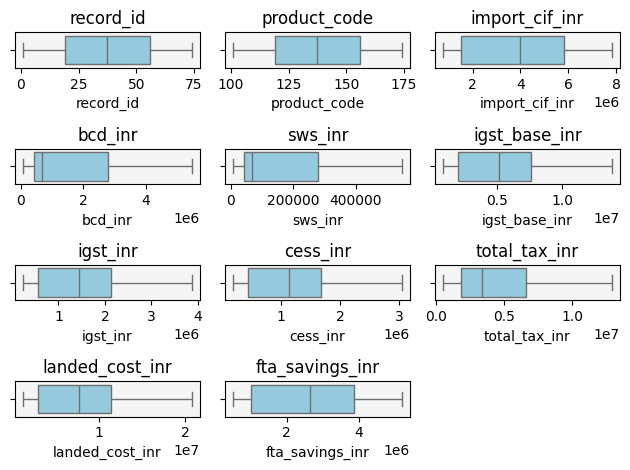

In [55]:
for i , col in enumerate (num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(data = cost_model, x = col, color = 'skyblue')
    plt.title(col)
    plt.gca().set_facecolor('whitesmoke')

plt.tight_layout()
plt.show()

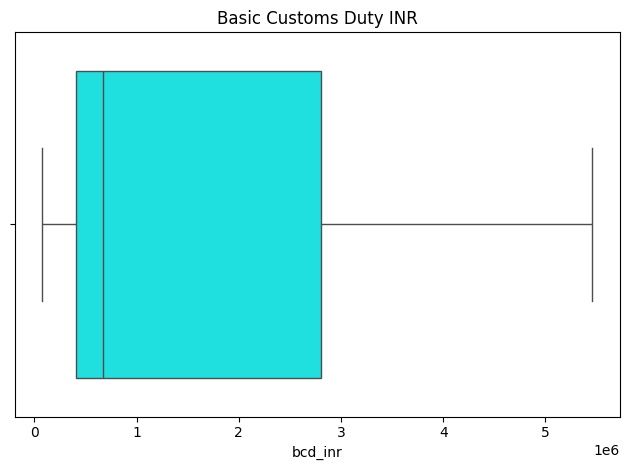

In [56]:
sns.boxplot(data= cost_model, x= 'bcd_inr', color = 'cyan')
plt.title('Basic Customs Duty INR')
plt.tight_layout()
plt.show()

# **Outlier Report**

As we can see through the boxplots above, there are no existing outliers in this dataset

# **Visualizations** 

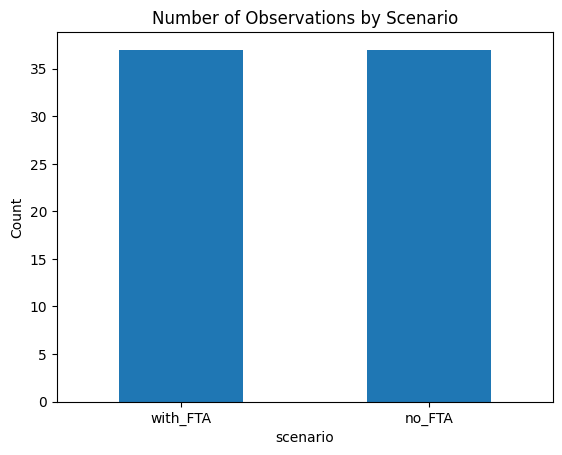

In [59]:
cost_model["scenario"].value_counts().plot(
    kind="bar",
    title="Number of Observations by Scenario",
    ylabel="Count",
    rot=0
)
plt.show()

Both policy scenarios are evenly represented, ensuring balanced comparison between pre-FTA and post-FTA outcomes.

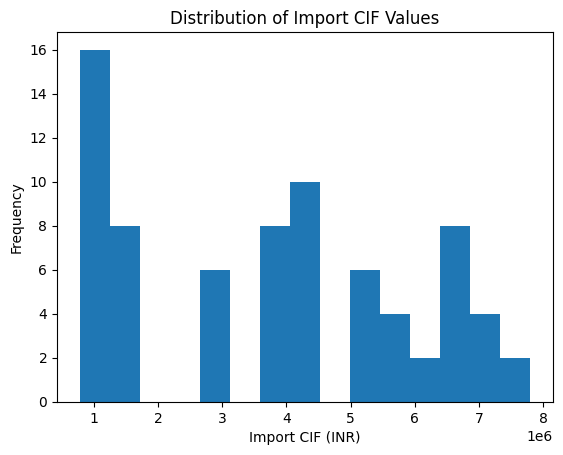

In [61]:
plt.hist(cost_model["import_cif_inr"], bins=15)
plt.title("Distribution of Import CIF Values")
plt.xlabel("Import CIF (INR)")
plt.ylabel("Frequency")
plt.show()


The CIF distribution shows a wide range of vehicle values, indicating inclusion of both mid-range and premium imported cars.

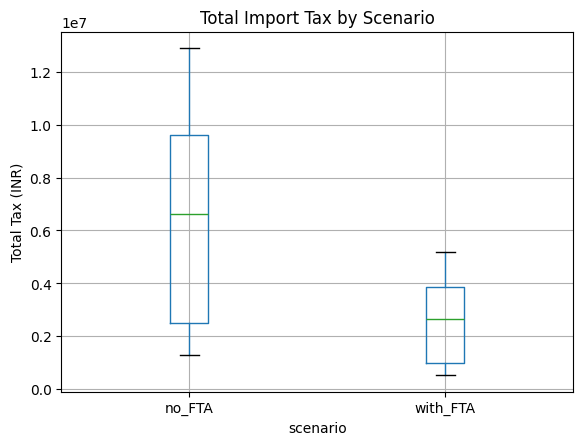

In [63]:
cost_model.boxplot(
    column="total_tax_inr",
    by="scenario"
)
plt.title("Total Import Tax by Scenario")
plt.suptitle("")
plt.ylabel("Total Tax (INR)")
plt.show()


Total import taxes are consistently lower under the FTA scenario, with a clear downward shift in the tax distribution.

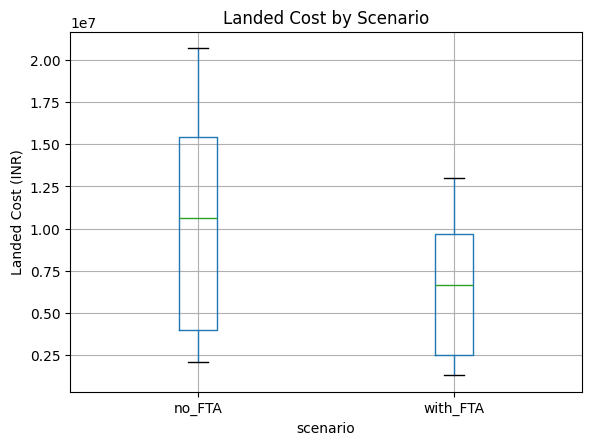

In [64]:
cost_model.boxplot(
    column="landed_cost_inr",
    by="scenario"
)
plt.title("Landed Cost by Scenario")
plt.suptitle("")
plt.ylabel("Landed Cost (INR)")
plt.show()


FTA-driven tax reductions translate directly into lower landed costs, though landed cost levels remain elevated due to indirect taxes

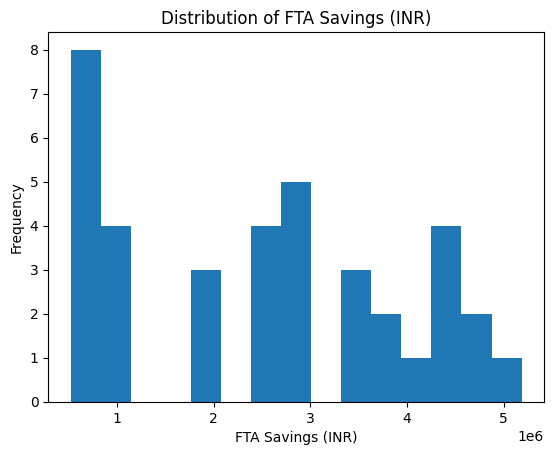

In [65]:
plt.hist(with_fta["fta_savings_inr"], bins=15)
plt.title("Distribution of FTA Savings (INR)")
plt.xlabel("FTA Savings (INR)")
plt.ylabel("Frequency")
plt.show()


FTA savings exhibit a right-skewed distribution, indicating that higher-value vehicles capture larger absolute benefits.

In [68]:
brand_savings = (
    with_fta
    .groupby("brand_name")["fta_savings_inr"]
    .mean()
    .sort_values(ascending=False)
)

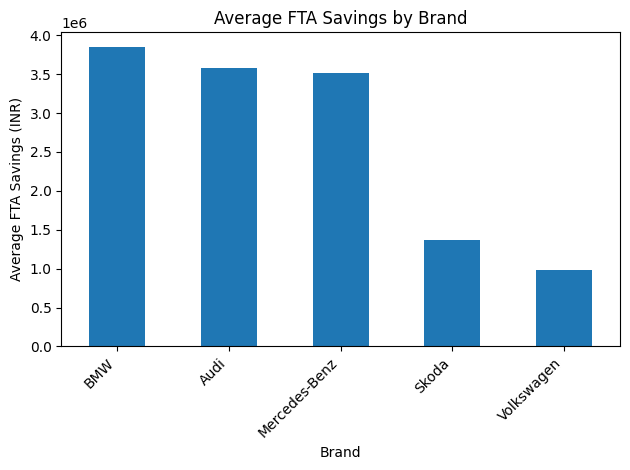

In [69]:
import matplotlib.pyplot as plt

plt.figure()
brand_savings.plot(kind="bar")
plt.title("Average FTA Savings by Brand")
plt.xlabel("Brand")
plt.ylabel("Average FTA Savings (INR)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Brand-wise FTA Savings

The bar chart illustrates average FTA-driven tax savings across automobile brands. Premium European brands exhibit higher absolute savings due to higher import CIF values, while mass-market brands show relatively lower monetary gains.

However, the observed differences are driven by vehicle price levels rather than brand-specific policy treatment, indicating that the FTA impact scales proportionally with vehicle value.


In [70]:
comparison_df = with_fta.merge(
    car_master[["record_id", "ex_showroom_inr"]],
    on="record_id",
    how="left"
)

In [71]:
comparison_df[["landed_cost_inr", "ex_showroom_inr"]].head()


,landed_cost_inr,ex_showroom_inr
0,"6,327,000.00",4600000
1,"6,660,000.00",4800000
2,"8,325,000.00",5900000
3,"8,991,000.00",6400000
4,"10,822,500.00",7800000


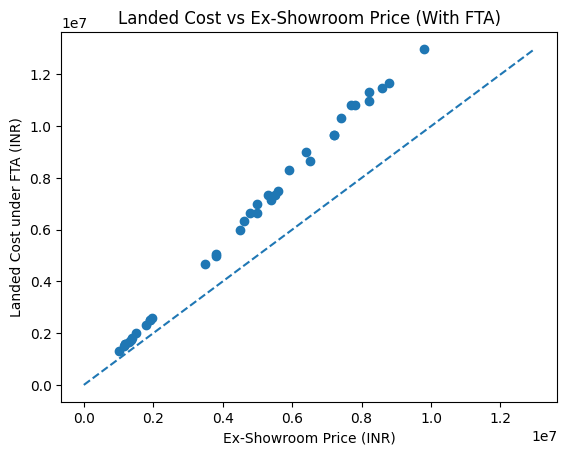

In [74]:
import matplotlib.pyplot as plt

max_val = max(
    comparison_df["ex_showroom_inr"].max(),
    comparison_df["landed_cost_inr"].max()
)

plt.figure()
plt.scatter(
    comparison_df["ex_showroom_inr"],
    comparison_df["landed_cost_inr"]
)

plt.plot([0, max_val], [0, max_val], linestyle="--")

plt.xlabel("Ex-Showroom Price (INR)")
plt.ylabel("Landed Cost under FTA (INR)")
plt.title("Landed Cost vs Ex-Showroom Price (With FTA)")

plt.show()


### Landed Cost vs Ex-Showroom Price

The scatter plot compares imported vehicle landed costs under the FTA scenario with their corresponding Indian ex-showroom prices. Most observations lie above the 45-degree reference line, indicating that even after tariff reductions, imported vehicles remain more expensive than their domestically sold counterparts.

This highlights the continued impact of indirect taxes such as IGST and cess, which limit the extent to which customs duty reductions alone can equalize import and domestic prices.


In [76]:
landed_pivot = cost_model.pivot_table(
    index=["record_id", "brand_name", "model_name"],
    columns="scenario",
    values="landed_cost_inr"
).reset_index()

landed_pivot.head()


scenario,record_id,brand_name,model_name,no_FTA,with_FTA
0,1.00,Mercedes-Benz,A-Class Limousine,NaN,"6,327,000.00"
1,2.00,Mercedes-Benz,A-Class Limousine,NaN,"6,660,000.00"
2,3.00,Mercedes-Benz,C-Class,NaN,"8,325,000.00"
3,4.00,Mercedes-Benz,C-Class,NaN,"8,991,000.00"
4,5.00,Mercedes-Benz,E-Class,NaN,"10,822,500.00"


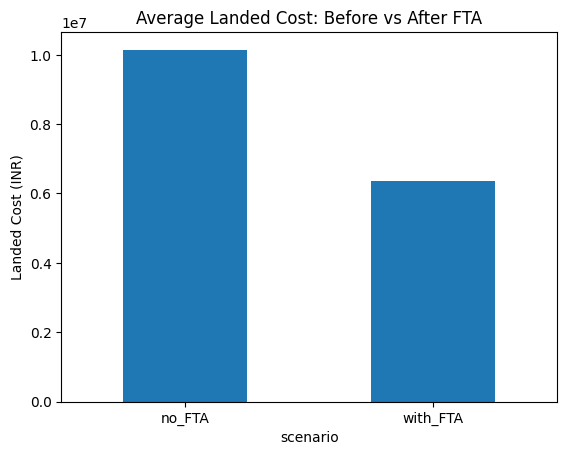

In [78]:
avg_landed = landed_pivot[["no_FTA", "with_FTA"]].mean()

plt.figure()
avg_landed.plot(kind="bar")
plt.title("Average Landed Cost: Before vs After FTA")
plt.ylabel("Landed Cost (INR)")
plt.xticks(rotation=0)
plt.show()


### Before vs After FTA: Landed Cost Comparison

The bar chart shows a clear reduction in average landed costs under the FTA scenario compared to the current import regime. This confirms that customs duty reductions materially lower the cost of importing passenger vehicles.

However, the remaining gap highlights the continued role of indirect taxes such as IGST and compensation cess in sustaining elevated landed costs even after tariff liberalization.


## Final Conclusions and Policy Implications

### Key Conclusions

1. **Import taxes constitute a substantial portion of vehicle landed cost**  
   Under the current (No_FTA) regime, import duties and indirect taxes significantly inflate vehicle costs relative to their CIF values, resulting in high landed costs for imported passenger vehicles.

2. **The India–EU FTA leads to a clear reduction in import taxes and landed costs**  
   The With_FTA scenario consistently shows lower total import taxes and landed costs across all vehicles, confirming that reductions in Basic Customs Duty materially affect import economics.


3. **Percentage savings are relatively uniform across vehicles and brands**  
   Despite differences in absolute savings, the percentage reduction in import taxes remains broadly similar, indicating that FTA benefits are driven by uniform tariff reductions rather than brand-specific advantages.


---

### Policy Implications


- **Premium vehicle segments benefit more in absolute monetary terms**  
  Policymakers should note that FTA benefits accrue disproportionately in INR terms to higher-value vehicles, which may influence market composition and import patterns.


- **FTA impact is predictable and policy-driven**  
  The relatively stable percentage savings across vehicles suggests that FTA outcomes can be reliably estimated using scenario-based models, supporting informed policy and industry planning.

---

### Limitations and Scope for Further Work

- Import CIF values are estimated due to lack of publicly available invoice data.
- Dealer margins, logistics beyond the port, and registration costs are not included.
- Future work could extend the analysis to electric vehicles, alternative duty scenarios, or demand-side effects.
